Импорт библиотек

In [1]:
import os
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

import torch
import torchvision

import random
from torchvision import transforms, models
import torch.nn.functional as F

Запись трансформаций (т.е. преобразований) для изображений, с целью приведения разных по разрешению и форме изображений к одному виду, что необходимо для скармливания нейросети 

In [2]:
train_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

valid_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

Пути к датасетам

In [3]:
train_path_kandinskiy = 'your path'
test_path_kandinskiy = 'your path'
valid_path_kandinskiy = 'your path'

train_path_yandex = 'your path'
test_path_yandex = 'your path'
valid_path_yandex = 'your path'
n_classes=2

In [4]:
train_path_biggan = 'your path'
valid_path_biggan = 'your path'

train_path_vqbm = 'your path'
valid_path_vqbm = 'your path'

train_path_sdv5 = 'your path'
valid_path_sdv5 = 'your path'

train_path_wukong = 'your path'
valid_path_wukong = 'your path'

train_path_adm = 'your path'
valid_path_adm = 'your path'

train_path_glide = 'your path'
valid_path_glide = 'your path'

train_path_midjourney = 'your path'
valid_path_midjourney = 'your path'

Установка размера батча для дальнейшего обучения

In [5]:
batch_size = 10

Загрузка датасетов в dataloader для дальнейшего использования для обучения модели

In [6]:
train_dataset_kandinskiy = torchvision.datasets.ImageFolder(train_path_kandinskiy, train_transforms)
test_dataset_kandinskiy = torchvision.datasets.ImageFolder(test_path_kandinskiy, test_transforms)
valid_dataset_kandinskiy = torchvision.datasets.ImageFolder(valid_path_kandinskiy, valid_transforms)

train_dataloader_kandinskiy = torch.utils.data.DataLoader(train_dataset_kandinskiy, batch_size=batch_size, shuffle=True)
valid_dataloader_kandinskiy = torch.utils.data.DataLoader(valid_dataset_kandinskiy, batch_size=batch_size, shuffle=False)
test_dataloader_kandinskiy = torch.utils.data.DataLoader(test_dataset_kandinskiy, batch_size=batch_size, shuffle=False)

In [7]:
train_dataset_yandex = torchvision.datasets.ImageFolder(train_path_yandex, train_transforms)
test_dataset_yandex = torchvision.datasets.ImageFolder(test_path_yandex, test_transforms)
valid_dataset_yandex = torchvision.datasets.ImageFolder(valid_path_yandex, valid_transforms)

train_dataloader_yandex = torch.utils.data.DataLoader(train_dataset_yandex, batch_size=batch_size, shuffle=True)
valid_dataloader_yandex = torch.utils.data.DataLoader(valid_dataset_yandex, batch_size=batch_size, shuffle=False)
test_dataloader_yandex = torch.utils.data.DataLoader(test_dataset_yandex, batch_size=batch_size, shuffle=False)

In [8]:
train_dataset_biggan = torchvision.datasets.ImageFolder(train_path_biggan, train_transforms)
valid_dataset_biggan_ = torchvision.datasets.ImageFolder(valid_path_biggan, valid_transforms)

val_size = len(valid_dataset_biggan_) //2
test_size = len(valid_dataset_biggan_) - val_size

# Разделение
valid_dataset_biggan, test_dataset_biggan = torch.utils.data.random_split(
    valid_dataset_biggan_,
    [val_size, test_size],
    generator=torch.Generator().manual_seed(42)
)

train_dataloader_biggan = torch.utils.data.DataLoader(train_dataset_biggan, batch_size=batch_size, shuffle=True)
valid_dataloader_biggan = torch.utils.data.DataLoader(valid_dataset_biggan, batch_size=batch_size, shuffle=False)
test_dataloader_biggan =  torch.utils.data.DataLoader(test_dataset_biggan, batch_size=batch_size, shuffle=False)

In [9]:
train_dataset_vqbm = torchvision.datasets.ImageFolder(train_path_vqbm, train_transforms)
valid_dataset_vqbm_ = torchvision.datasets.ImageFolder(valid_path_vqbm, valid_transforms)

val_size = len(valid_dataset_vqbm_) //2
test_size = len(valid_dataset_vqbm_) - val_size

# Разделение
valid_dataset_vqbm, test_dataset_vqbm= torch.utils.data.random_split(
    valid_dataset_vqbm_,
    [val_size, test_size],
    generator=torch.Generator().manual_seed(42)
)

train_dataloader_vqbm = torch.utils.data.DataLoader(train_dataset_vqbm, batch_size=batch_size, shuffle=True)
valid_dataloader_vqbm = torch.utils.data.DataLoader(valid_dataset_vqbm, batch_size=batch_size, shuffle=False)
test_dataloader_vqbm =  torch.utils.data.DataLoader(test_dataset_vqbm, batch_size=batch_size, shuffle=False)

In [10]:
train_dataset_sdv5 = torchvision.datasets.ImageFolder(train_path_sdv5, train_transforms)
valid_dataset_sdv5_ = torchvision.datasets.ImageFolder(valid_path_sdv5, valid_transforms)

val_size = len(valid_dataset_sdv5_) //2
test_size = len(valid_dataset_sdv5_) - val_size

# Разделение
valid_dataset_sdv5, test_dataset_sdv5 = torch.utils.data.random_split(
    valid_dataset_sdv5_,
    [val_size, test_size],
    generator=torch.Generator().manual_seed(42)
)

train_dataloader_sdv5 = torch.utils.data.DataLoader(train_dataset_sdv5, batch_size=batch_size, shuffle=True)
valid_dataloader_sdv5 = torch.utils.data.DataLoader(valid_dataset_sdv5, batch_size=batch_size, shuffle=False)
test_dataloader_sdv5 =  torch.utils.data.DataLoader(test_dataset_sdv5, batch_size=batch_size, shuffle=False)

In [11]:
train_dataset_wukong = torchvision.datasets.ImageFolder(train_path_wukong, train_transforms)
valid_dataset_wukong_ = torchvision.datasets.ImageFolder(valid_path_wukong, valid_transforms)

val_size = len(valid_dataset_wukong_) //2
test_size = len(valid_dataset_wukong_) - val_size

# Разделение
valid_dataset_wukong, test_dataset_wukong = torch.utils.data.random_split(
    valid_dataset_wukong_,
    [val_size, test_size],
    generator=torch.Generator().manual_seed(42)
)

train_dataloader_wukong = torch.utils.data.DataLoader(train_dataset_wukong, batch_size=batch_size, shuffle=True)
valid_dataloader_wukong = torch.utils.data.DataLoader(valid_dataset_wukong, batch_size=batch_size, shuffle=False)
test_dataloader_wukong =  torch.utils.data.DataLoader(test_dataset_wukong, batch_size=batch_size, shuffle=False)

In [12]:
train_dataset_adm = torchvision.datasets.ImageFolder(train_path_adm, train_transforms)
valid_dataset_adm_ = torchvision.datasets.ImageFolder(valid_path_adm, valid_transforms)

val_size = len(valid_dataset_adm_) //2
test_size = len(valid_dataset_adm_) - val_size

# Разделение
valid_dataset_adm, test_dataset_adm = torch.utils.data.random_split(
    valid_dataset_adm_,
    [val_size, test_size],
    generator=torch.Generator().manual_seed(42)
)

train_dataloader_adm = torch.utils.data.DataLoader(train_dataset_adm, batch_size=batch_size, shuffle=True)
valid_dataloader_adm = torch.utils.data.DataLoader(valid_dataset_adm, batch_size=batch_size, shuffle=False)
test_dataloader_adm =  torch.utils.data.DataLoader(test_dataset_adm, batch_size=batch_size, shuffle=False)

In [13]:
train_dataset_glide = torchvision.datasets.ImageFolder(train_path_glide, train_transforms)
valid_dataset_glide_ = torchvision.datasets.ImageFolder(valid_path_glide, valid_transforms)

val_size = len(valid_dataset_glide_) //2
test_size = len(valid_dataset_glide_) - val_size

# Разделение
valid_dataset_glide, test_dataset_glide = torch.utils.data.random_split(
    valid_dataset_glide_,
    [val_size, test_size],
    generator=torch.Generator().manual_seed(42)
)

train_dataloader_glide = torch.utils.data.DataLoader(train_dataset_glide, batch_size=batch_size, shuffle=True)
valid_dataloader_glide = torch.utils.data.DataLoader(valid_dataset_glide, batch_size=batch_size, shuffle=False)
test_dataloader_glide =  torch.utils.data.DataLoader(test_dataset_glide, batch_size=batch_size, shuffle=False)

In [14]:
train_dataset_midjourney = torchvision.datasets.ImageFolder(train_path_midjourney, train_transforms)
valid_dataset_midjourney_ = torchvision.datasets.ImageFolder(valid_path_midjourney, valid_transforms)

val_size = len(valid_dataset_midjourney_) //2
test_size = len(valid_dataset_midjourney_) - val_size

# Разделение
valid_dataset_midjourney, test_dataset_midjourney = torch.utils.data.random_split(
    valid_dataset_midjourney_,
    [val_size, test_size],
    generator=torch.Generator().manual_seed(42)
)

train_dataloader_midjourney = torch.utils.data.DataLoader(train_dataset_midjourney, batch_size=batch_size, shuffle=True)
valid_dataloader_midjourney = torch.utils.data.DataLoader(valid_dataset_midjourney, batch_size=batch_size, shuffle=False)
test_dataloader_midjourney =  torch.utils.data.DataLoader(test_dataset_midjourney, batch_size=batch_size, shuffle=False)

In [15]:
names_dataloaders = ["kandinskiy", "yandex", "biggan", "vqbm", "sdv5", "wukong", "adm", "glide", "midjourney"]
train_datasets = [train_dataset_kandinskiy, train_dataset_yandex, train_dataset_biggan, train_dataset_vqbm, train_dataset_sdv5, train_dataset_wukong, train_dataset_adm, train_dataset_glide, train_dataset_midjourney]
valid_datasets = [valid_dataset_kandinskiy, valid_dataset_yandex, valid_dataset_biggan, valid_dataset_vqbm, valid_dataset_sdv5, valid_dataset_wukong, valid_dataset_adm, valid_dataset_glide, valid_dataset_midjourney]
test_datasets = [test_dataset_kandinskiy, test_dataset_yandex, test_dataset_biggan, test_dataset_vqbm, test_dataset_sdv5, test_dataset_wukong, test_dataset_adm, test_dataset_glide, test_dataset_midjourney]

train_dataloaders = [train_dataloader_kandinskiy, train_dataloader_yandex, train_dataloader_biggan, train_dataloader_vqbm, train_dataloader_sdv5, train_dataloader_wukong, train_dataloader_adm, train_dataloader_glide, train_dataloader_midjourney]
valid_dataloaders = [valid_dataloader_kandinskiy, valid_dataloader_yandex, valid_dataloader_biggan, valid_dataloader_vqbm, valid_dataloader_sdv5, valid_dataloader_wukong, valid_dataloader_adm, valid_dataloader_glide, valid_dataloader_midjourney]
test_dataloaders = [test_dataloader_kandinskiy, test_dataloader_yandex, test_dataloader_biggan, test_dataloader_vqbm, test_dataloader_sdv5, test_dataloader_wukong, test_dataloader_adm, test_dataloader_glide, test_dataloader_midjourney]


In [16]:
train_dataloader = torch.utils.data.DataLoader(torch.utils.data.ConcatDataset(train_datasets), batch_size=batch_size, shuffle=True)
valid_dataloader = torch.utils.data.DataLoader(torch.utils.data.ConcatDataset(valid_datasets), batch_size=batch_size, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(torch.utils.data.ConcatDataset(test_datasets), batch_size=batch_size, shuffle=False)

In [17]:
type(test_dataloader)

torch.utils.data.dataloader.DataLoader

In [18]:
X, y = next(iter(test_dataloader))
print(X.shape)

torch.Size([10, 3, 256, 256])


Функция обучения с вычислением функций потерь и метрики точности

In [19]:
def train(model, optimizer, loss_fn, train_loader, valid_loader, n_epochs=10):
    losses_t = []
    losses_v = []
    accuracy_t = []
    accuracy_v = []
    for epoch in range(1, n_epochs + 1):
        train_loss = 0.0
        valid_loss = 0.0

        model.train()
        train_num_correct = 0
        train_num_examples = 0
        for batch in train_loader:
            optimizer.zero_grad()
            inputs, targets = batch
            inputs = inputs.to(device)
            targets = targets.to(device)
            output = model(inputs)
            loss = loss_fn(output, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.data.item() * inputs.size(0)
            correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets)
            train_num_correct += torch.sum(correct).item()
            train_num_examples += correct.shape[0]
        train_loss /= len(train_loader.dataset)
        
        model.eval()
        valid_num_correct = 0
        valid_num_examples = 0
        for batch in valid_loader:
            inputs, targets = batch
            inputs = inputs.to(device)
            output = model(inputs)
            targets = targets.to(device)
            loss = loss_fn(output, targets)
            valid_loss += loss.data.item() * inputs.size(0)
            correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets)
            valid_num_correct += torch.sum(correct).item()
            valid_num_examples += correct.shape[0]
        valid_loss /= len(valid_loader.dataset)
        losses_t.append(train_loss)
        losses_v.append(valid_loss)
        accuracy_t.append(train_num_correct / train_num_examples)
        accuracy_v.append(valid_num_correct / valid_num_examples)
        print('Epoch: {}, train loss: {:.2f}, valid loss: {:.2f},train accuracy: {:.2f}, valid accuracy: {:.2f}'\
              .format(epoch, train_loss, valid_loss, train_num_correct / train_num_examples, valid_num_correct / valid_num_examples))
    return losses_t, losses_v, accuracy_t, accuracy_v

Функция тестирования модели

In [20]:
def test(model,test_loader):
    model.eval()
    num_correct = 0
    num_examples = 0
    for batch in test_loader:
        inputs, targets = batch
        inputs = inputs.to(device)
        output = model(inputs)
        targets = targets.to(device)
        correct = torch.eq(torch.max(F.softmax(output), dim=1)[1], targets)
        num_correct += torch.sum(correct).item()
        num_examples += correct.shape[0]
    
    return 'accuracy: {:.2f}'.format(num_correct/num_examples)


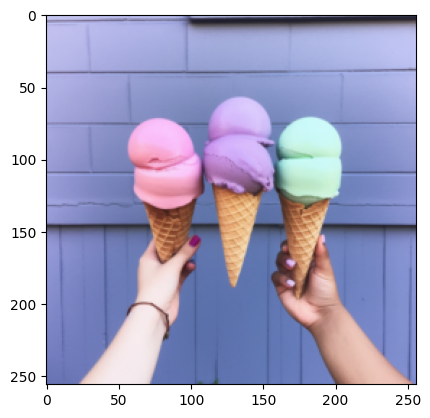

0 tensor(0)


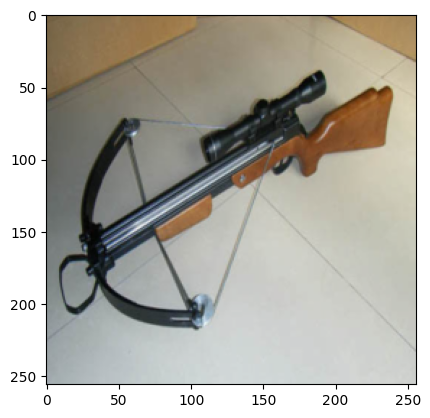

1 tensor(1)


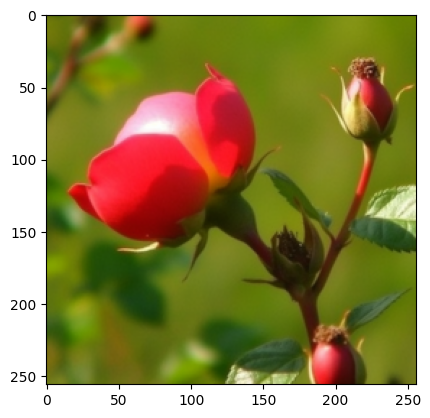

2 tensor(0)


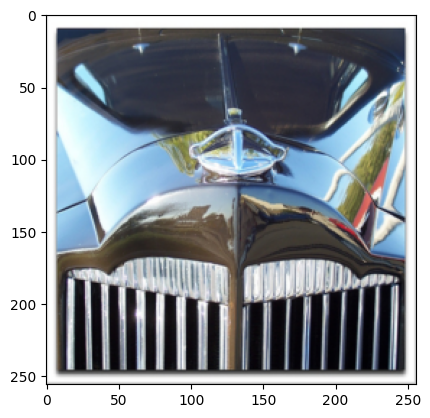

3 tensor(1)


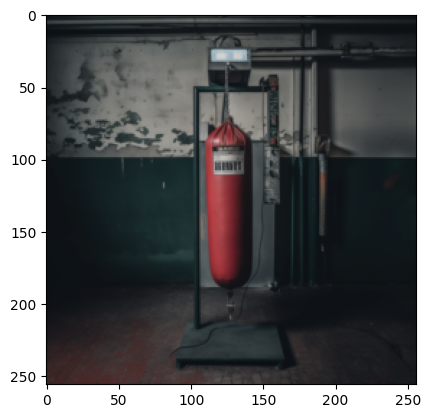

4 tensor(0)


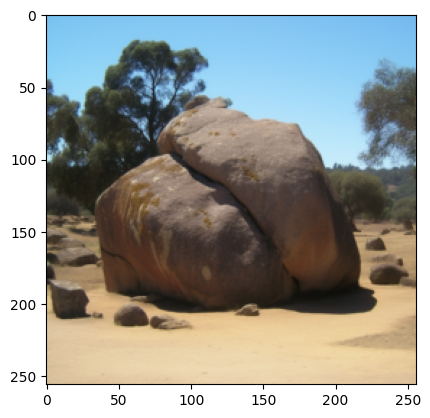

5 tensor(0)


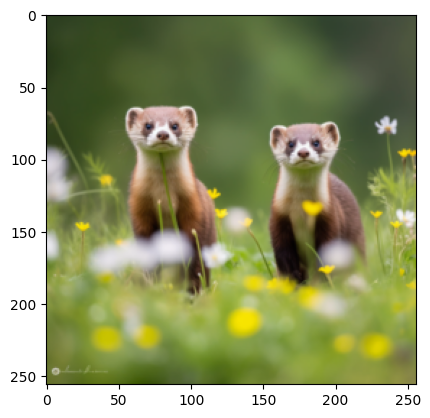

6 tensor(0)


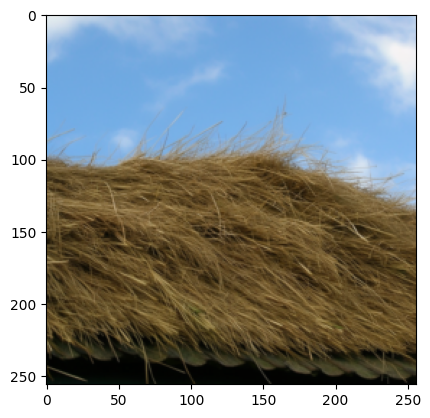

7 tensor(0)


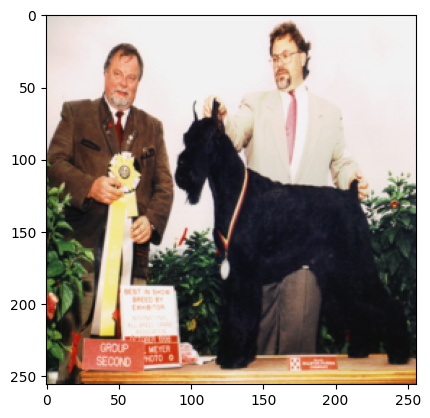

8 tensor(1)


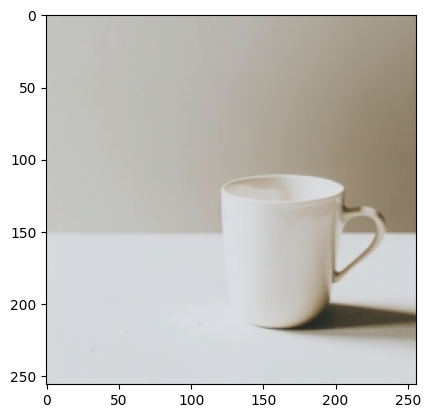

9 tensor(0)


In [21]:
X, y = next(iter(train_dataloader_midjourney))
for i in range(batch_size):
  X.shape
  mean = np.array([0.485, 0.456, 0.406])
  std = np.array([0.229, 0.224, 0.225])
  plt.imshow(X[i].permute(1, 2, 0).numpy() * std + mean)
  plt.show()
  print(i, y[i])

In [22]:
stats = []
for i in range(9):
    model = models.resnet50(weights=None)
    weights_path = "/kaggle/input/resnet50/pytorch/default/1/resnet50-0676ba61.pth"
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    state_dict = torch.load(weights_path, map_location="cuda")
    model.load_state_dict(state_dict)
    print("cuda:0" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    
    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-3)
    
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
    losses_curr, losses_curr, accuracy_curr, accuracy_curr = train(model, optimizer, loss_fn, train_dataloaders[i], valid_dataloaders[i], n_epochs=10)
    stats.append((losses_curr, losses_curr, accuracy_curr, accuracy_curr))
    print(f"Точность при обучении на {names_dataloaders[i]}")
    print(f"Тест на {names_dataloaders[i]}: {test(model, test_dataloaders[i])}", end="\n")
    for j in range(len(test_dataloaders)):
        print(f"Тест на {names_dataloaders[j]}: {test(model, test_dataloaders[j])}", end="\n")

<ipython-input-22-c1abcaf62f56>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(weights_path, map_location="cuda")


cuda:0
Epoch: 1, train loss: 0.38, valid loss: 0.36,train accuracy: 0.86, valid accuracy: 0.87
Epoch: 2, train loss: 0.25, valid loss: 0.24,train accuracy: 0.89, valid accuracy: 0.90
Epoch: 3, train loss: 0.22, valid loss: 0.19,train accuracy: 0.91, valid accuracy: 0.92
Epoch: 4, train loss: 0.17, valid loss: 0.15,train accuracy: 0.93, valid accuracy: 0.94
Epoch: 5, train loss: 0.17, valid loss: 0.13,train accuracy: 0.94, valid accuracy: 0.96
Epoch: 6, train loss: 0.16, valid loss: 0.11,train accuracy: 0.94, valid accuracy: 0.96
Epoch: 7, train loss: 0.16, valid loss: 0.13,train accuracy: 0.94, valid accuracy: 0.95
Epoch: 8, train loss: 0.14, valid loss: 0.24,train accuracy: 0.95, valid accuracy: 0.92
Epoch: 9, train loss: 0.13, valid loss: 0.12,train accuracy: 0.95, valid accuracy: 0.95
Epoch: 10, train loss: 0.13, valid loss: 0.08,train accuracy: 0.95, valid accuracy: 0.97
Точность при обучении на kandinskiy


<ipython-input-20-ed57ea374178>:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  correct = torch.eq(torch.max(F.softmax(output), dim=1)[1], targets)


Тест на kandinskiy: accuracy: 0.96
Тест на kandinskiy: accuracy: 0.96
Тест на yandex: accuracy: 0.74
Тест на biggan: accuracy: 0.46
Тест на vqbm: accuracy: 0.45
Тест на sdv5: accuracy: 0.55
Тест на wukong: accuracy: 0.61
Тест на adm: accuracy: 0.45
Тест на glide: accuracy: 0.47
Тест на midjourney: accuracy: 0.57
cuda:0
Epoch: 1, train loss: 0.32, valid loss: 0.17,train accuracy: 0.88, valid accuracy: 0.95
Epoch: 2, train loss: 0.19, valid loss: 0.13,train accuracy: 0.92, valid accuracy: 0.96
Epoch: 3, train loss: 0.15, valid loss: 0.16,train accuracy: 0.94, valid accuracy: 0.94
Epoch: 4, train loss: 0.14, valid loss: 0.08,train accuracy: 0.95, valid accuracy: 0.98
Epoch: 5, train loss: 0.13, valid loss: 0.07,train accuracy: 0.95, valid accuracy: 0.98
Epoch: 6, train loss: 0.12, valid loss: 0.11,train accuracy: 0.95, valid accuracy: 0.96
Epoch: 7, train loss: 0.11, valid loss: 0.11,train accuracy: 0.96, valid accuracy: 0.96
Epoch: 8, train loss: 0.10, valid loss: 0.07,train accuracy: 0.

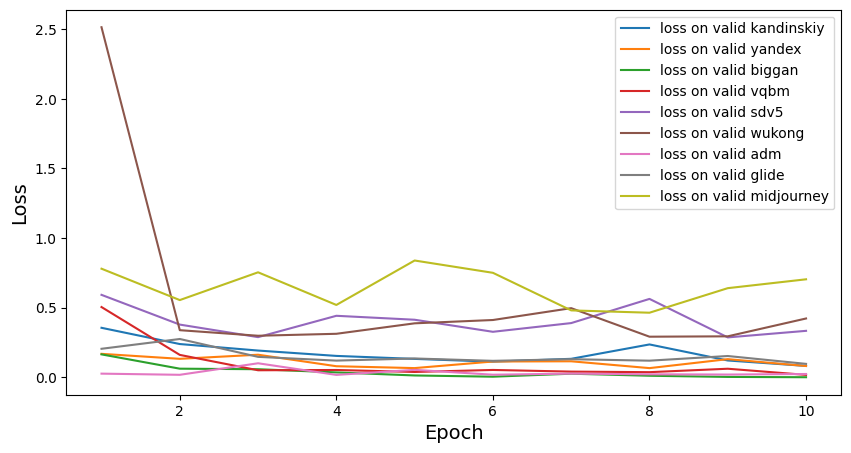

In [25]:
x = range(1, 11)
fig = plt.figure(figsize=(10, 5))
for i in range(9):
    #plt.plot(x, stats[i][0], label=f'loss on train {names_dataloaders[i]}')
    plt.plot(x, stats[i][1], label=f'loss on valid {names_dataloaders[i]}')
plt.legend()
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
fig.savefig("losses")
fig.show()

Обучение модели

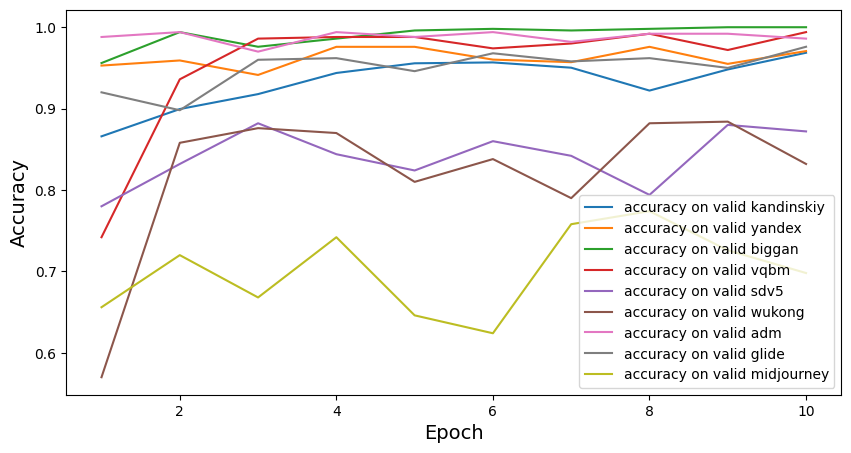

In [26]:
x = range(1, 11)
fig = plt.figure(figsize=(10, 5))
for i in range(9):
    #plt.plot(x, stats[i][2], label=f'accuracy on train {names_dataloaders[i]}')
    plt.plot(x, stats[i][3], label=f'accuracy on valid {names_dataloaders[i]}')
plt.legend()
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
fig.savefig("accs")
fig.show()

In [29]:
stats_swin = []
for i in range(9):
    model = models.swin_t(weights=None)
    weights_path = "your path"# weights swin-t (swin-t-imagenet1k)
    state_dict = torch.load(weights_path, map_location="cuda")
    model.load_state_dict(state_dict)
    num_features = model.head.in_features
    model.head = torch.nn.Linear(num_features, n_classes)
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    
    loss_fn = torch.nn.CrossEntropyLoss()
    
    optimizer = torch.optim.AdamW(
        model.parameters(),
        lr=3e-5,
        weight_decay=0.05
    )
    
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
        optimizer, 
        T_max=5,
        eta_min=1e-6
    )
    losses_curr, losses_curr, accuracy_curr, accuracy_curr = train(model, optimizer, loss_fn, train_dataloaders[i], valid_dataloaders[i], n_epochs=5)
    stats_swin.append((losses_curr, losses_curr, accuracy_curr, accuracy_curr))
    print(f"Точность при обучении на {names_dataloaders[i]}")
    print(f"Тест на {names_dataloaders[i]}: {test(model, test_dataloaders[i])}", end="\n")
    for j in range(len(test_dataloaders)):
        print(f"Тест на {names_dataloaders[j]}: {test(model, test_dataloaders[j])}", end="\n")

<ipython-input-29-591283ffb748>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(weights_path, map_location="cuda")


Epoch: 1, train loss: 0.06, valid loss: 0.01,train accuracy: 0.98, valid accuracy: 1.00
Epoch: 2, train loss: 0.01, valid loss: 0.01,train accuracy: 1.00, valid accuracy: 1.00
Epoch: 3, train loss: 0.01, valid loss: 0.01,train accuracy: 1.00, valid accuracy: 1.00
Epoch: 4, train loss: 0.01, valid loss: 0.01,train accuracy: 1.00, valid accuracy: 1.00
Epoch: 5, train loss: 0.01, valid loss: 0.01,train accuracy: 1.00, valid accuracy: 1.00
Точность при обучении на kandinskiy


<ipython-input-20-ed57ea374178>:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  correct = torch.eq(torch.max(F.softmax(output), dim=1)[1], targets)


Тест на kandinskiy: accuracy: 1.00
Тест на kandinskiy: accuracy: 1.00
Тест на yandex: accuracy: 0.50
Тест на biggan: accuracy: 0.49
Тест на vqbm: accuracy: 0.50
Тест на sdv5: accuracy: 0.53
Тест на wukong: accuracy: 0.56
Тест на adm: accuracy: 0.51
Тест на glide: accuracy: 0.55
Тест на midjourney: accuracy: 0.65
Epoch: 1, train loss: 0.05, valid loss: 0.01,train accuracy: 0.98, valid accuracy: 1.00
Epoch: 2, train loss: 0.01, valid loss: 0.00,train accuracy: 1.00, valid accuracy: 1.00
Epoch: 3, train loss: 0.01, valid loss: 0.01,train accuracy: 1.00, valid accuracy: 1.00
Epoch: 4, train loss: 0.01, valid loss: 0.00,train accuracy: 1.00, valid accuracy: 1.00
Epoch: 5, train loss: 0.00, valid loss: 0.00,train accuracy: 1.00, valid accuracy: 1.00
Точность при обучении на yandex
Тест на yandex: accuracy: 1.00
Тест на kandinskiy: accuracy: 0.71
Тест на yandex: accuracy: 1.00
Тест на biggan: accuracy: 0.51
Тест на vqbm: accuracy: 0.48
Тест на sdv5: accuracy: 0.58
Тест на wukong: accuracy: 0.

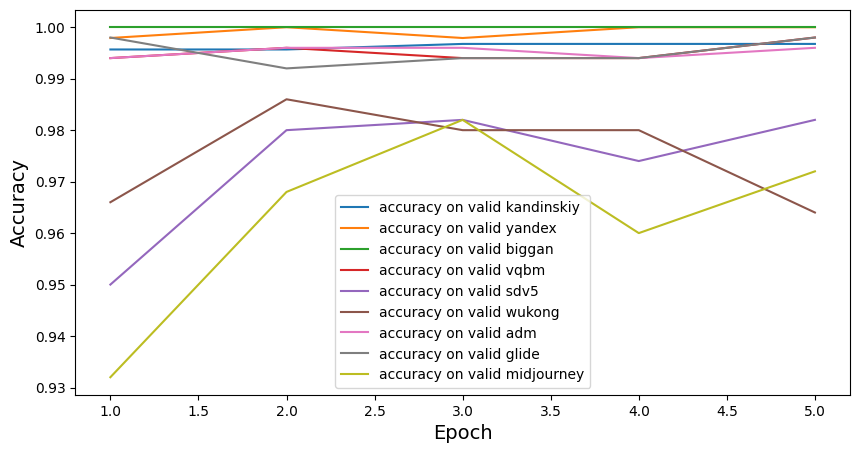

In [30]:
x = range(1, len(stats_swin[i][3])+1)
fig = plt.figure(figsize=(10, 5))
for i in range(9):
    #plt.plot(x, stats[i][2], label=f'accuracy on train {names_dataloaders[i]}')
    plt.plot(x, stats_swin[i][3], label=f'accuracy on valid {names_dataloaders[i]}')
plt.legend()
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
fig.savefig("accs_swin")
fig.show()

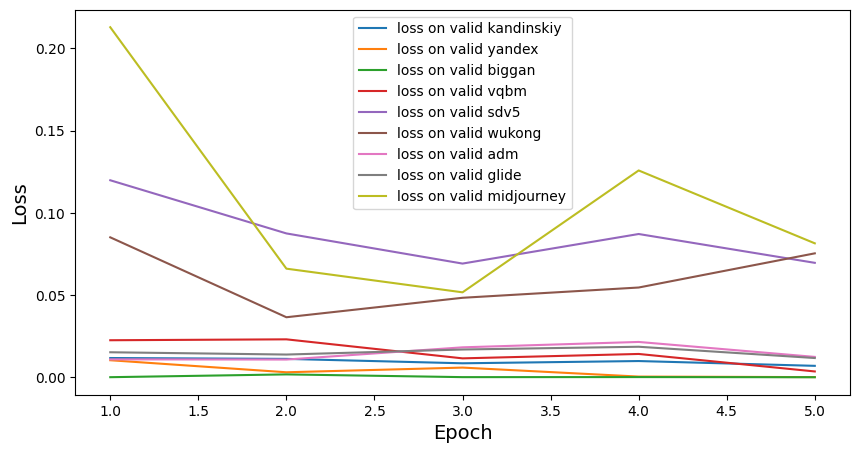

In [31]:
x = range(1, len(stats_swin[i][1])+1)
fig = plt.figure(figsize=(10, 5))
for i in range(9):
    #plt.plot(x, stats[i][0], label=f'loss on train {names_dataloaders[i]}')
    plt.plot(x, stats_swin[i][1], label=f'loss on valid {names_dataloaders[i]}')
plt.legend()
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
fig.savefig("losses_swin")
fig.show()

Обучение на объединенном датасете

ai
ai


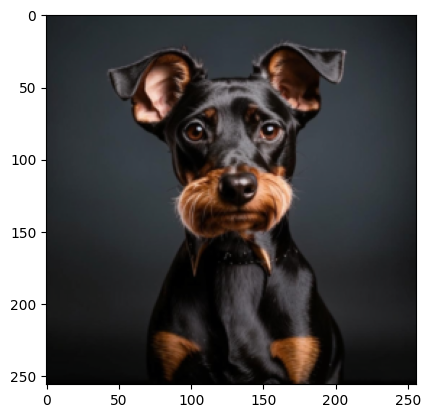

In [32]:
X, y = next(iter(test_dataloader))
output = model(X.to(device))
_, predicted = torch.max(output.data, 1)
print(train_dataset_kandinskiy.classes[predicted[0]])
print(train_dataset_kandinskiy.classes[y[0]])
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
plt.imshow(X[0].permute(1, 2, 0).numpy() * std + mean)


In [33]:
torch.save(model,'your path')

In [34]:
!zip -r graphs_n_checkpoint.zip /kaggle/working

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/model_checkpoint.pth (deflated 8%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)
  adding: kaggle/working/accs.png (deflated 7%)
  adding: kaggle/working/accs_swin.png (deflated 12%)
  adding: kaggle/working/losses.png (deflated 12%)
  adding: kaggle/working/losses_swin.png (deflated 11%)


In [35]:
from IPython.display import FileLink

FileLink('graphs_n_checkpoint.zip')

/kaggle/working/graphs_n_checkpoint.zip